In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")

In [9]:
#df
#df.head()
#df.tail()
#df.shape
#df.info()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [81]:
df.quality.unique()

array([0, 1], dtype=int64)

In [82]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

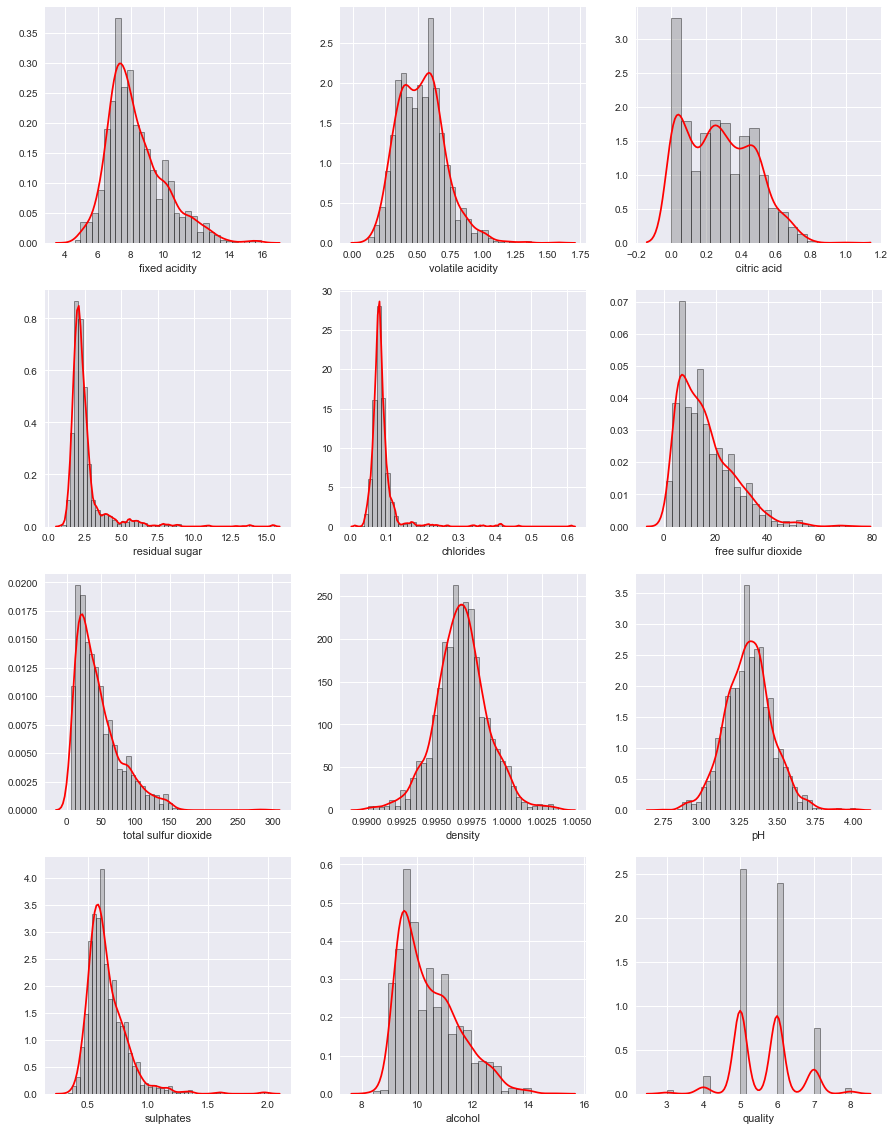

In [23]:
sns.set()
fig = plt.figure(figsize = [15,20])
cnt = 1
for col in df.columns :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

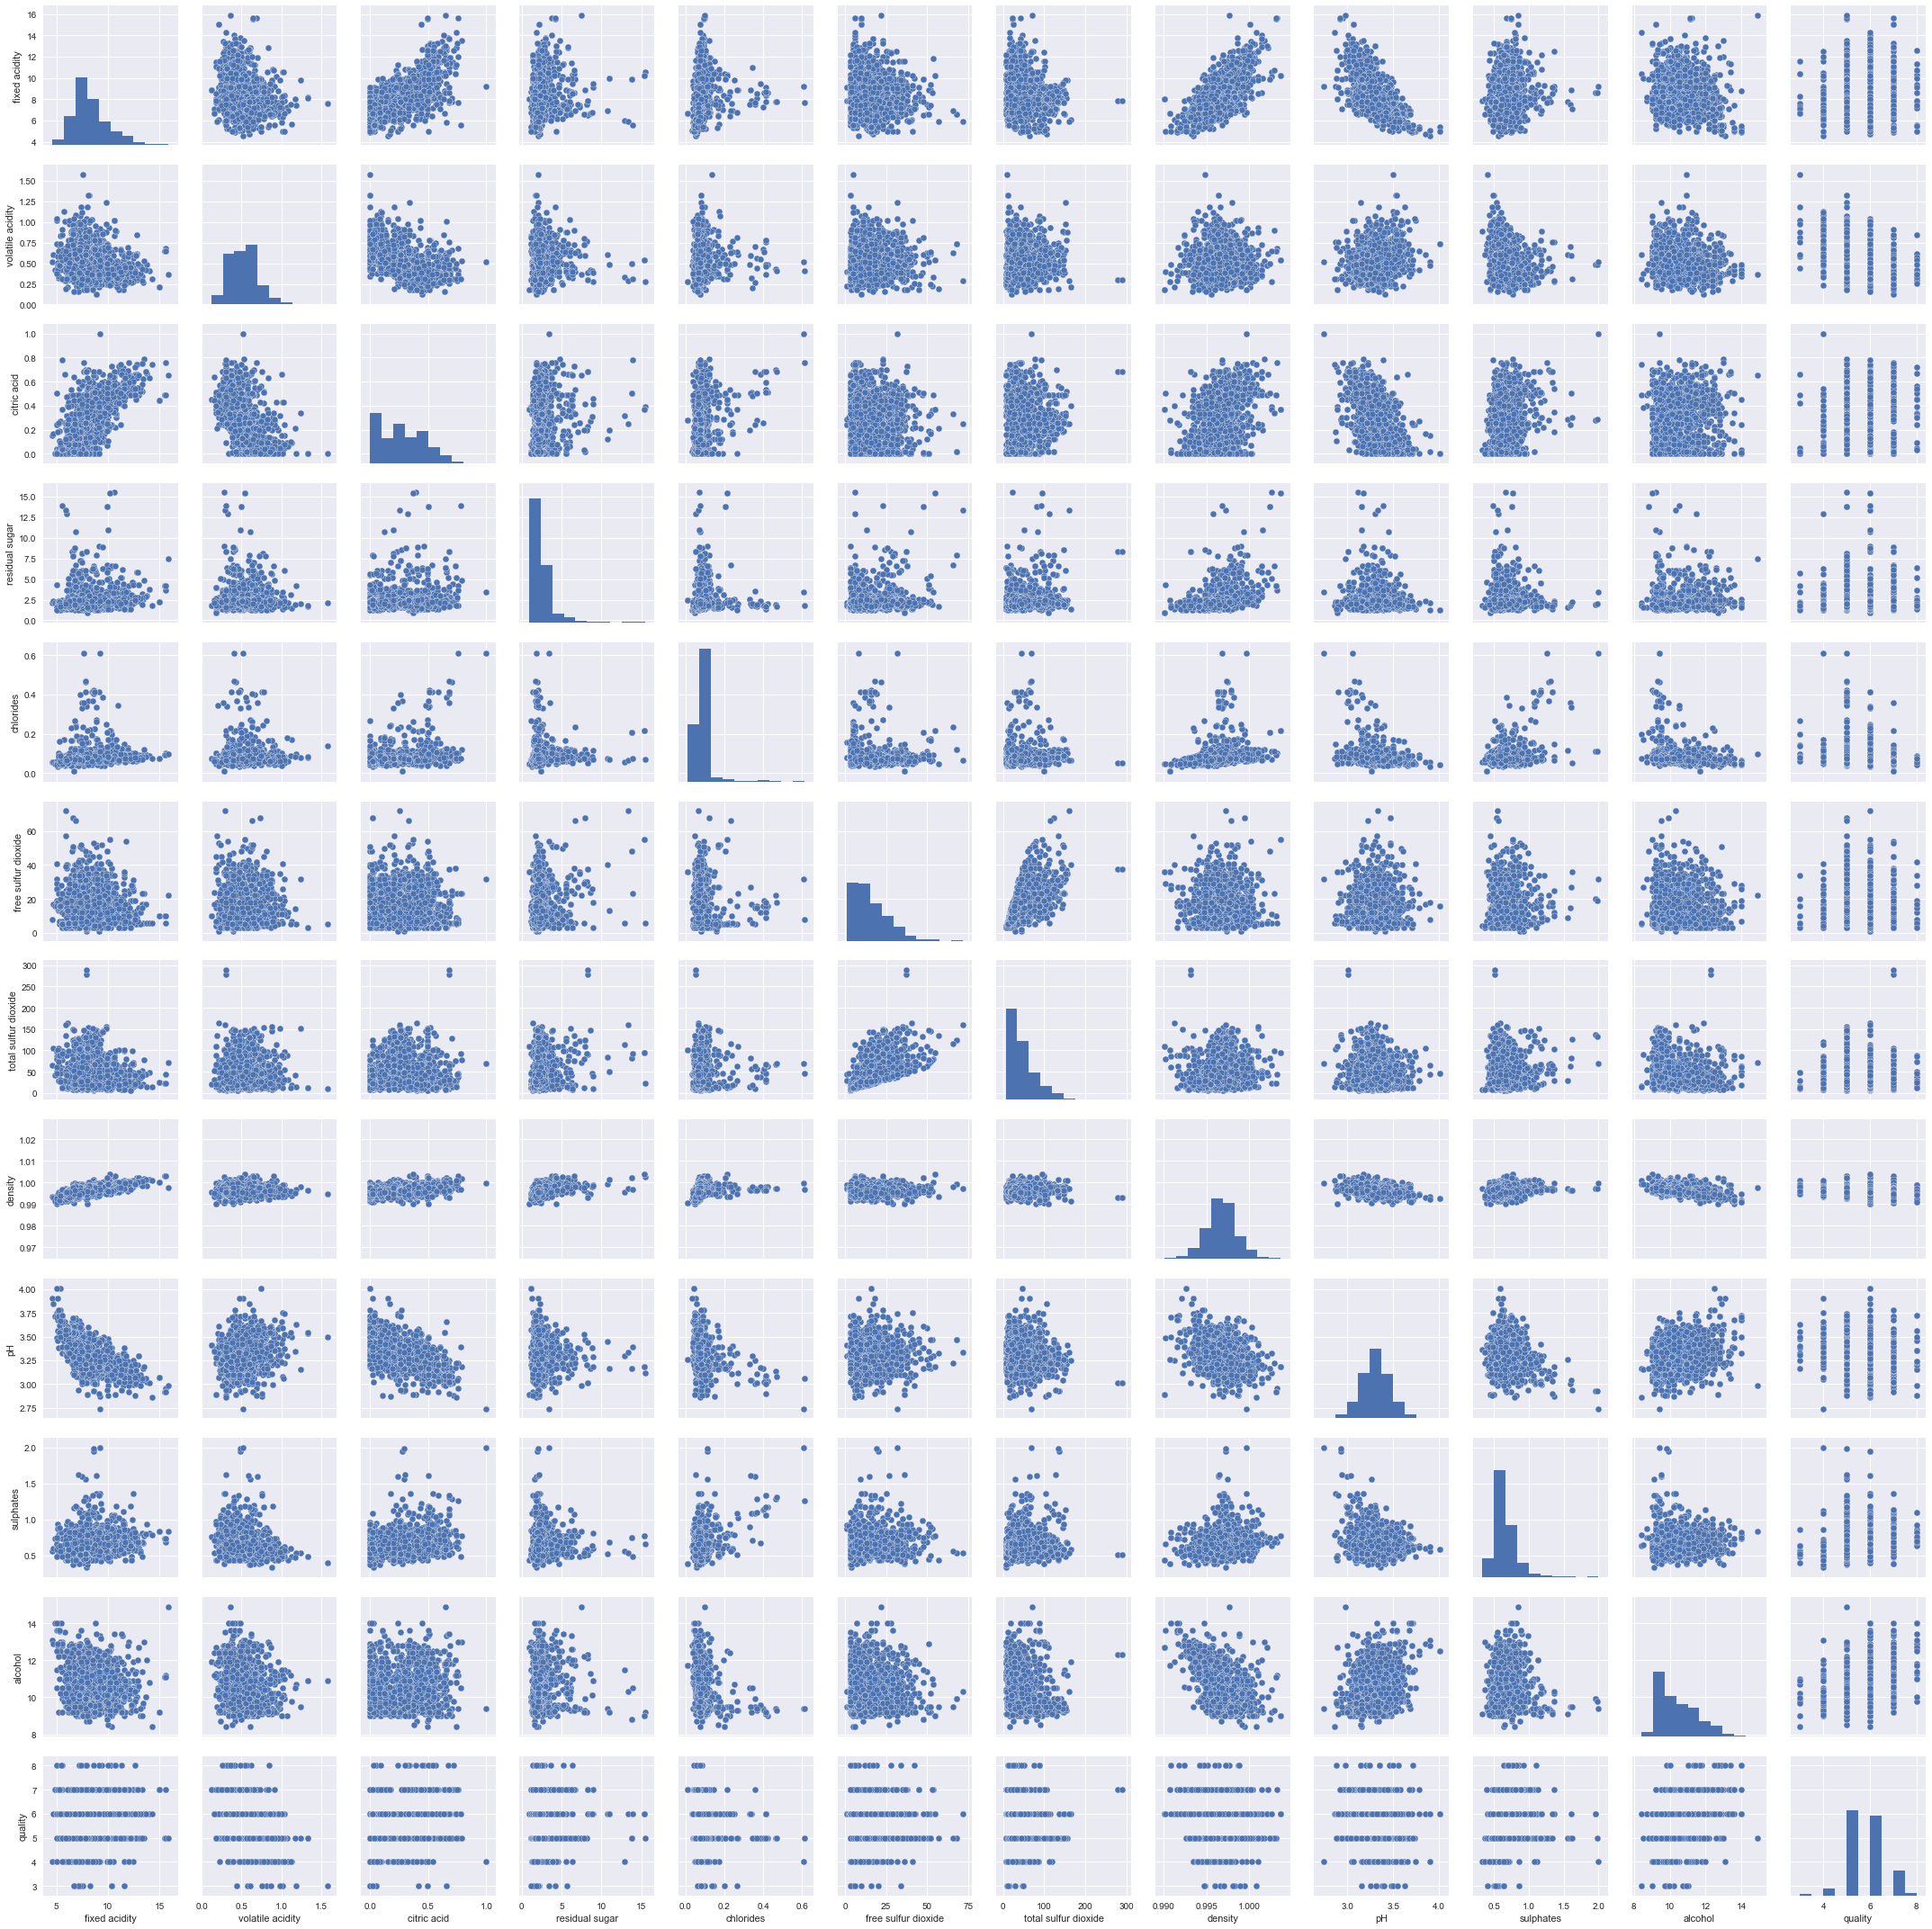

In [27]:
sns.pairplot(df)
plt.show()

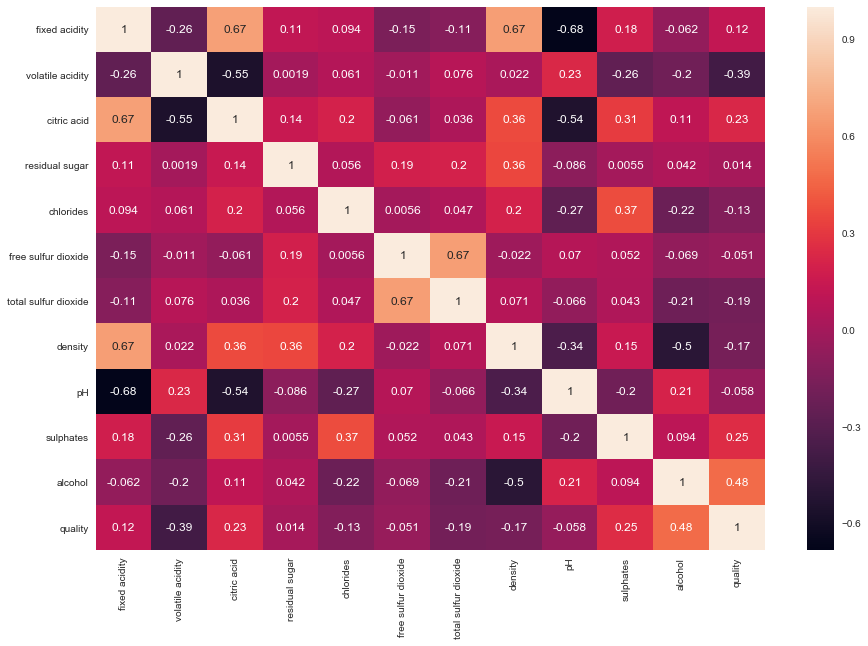

In [31]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(df.corr(),annot = True)
plt.show()

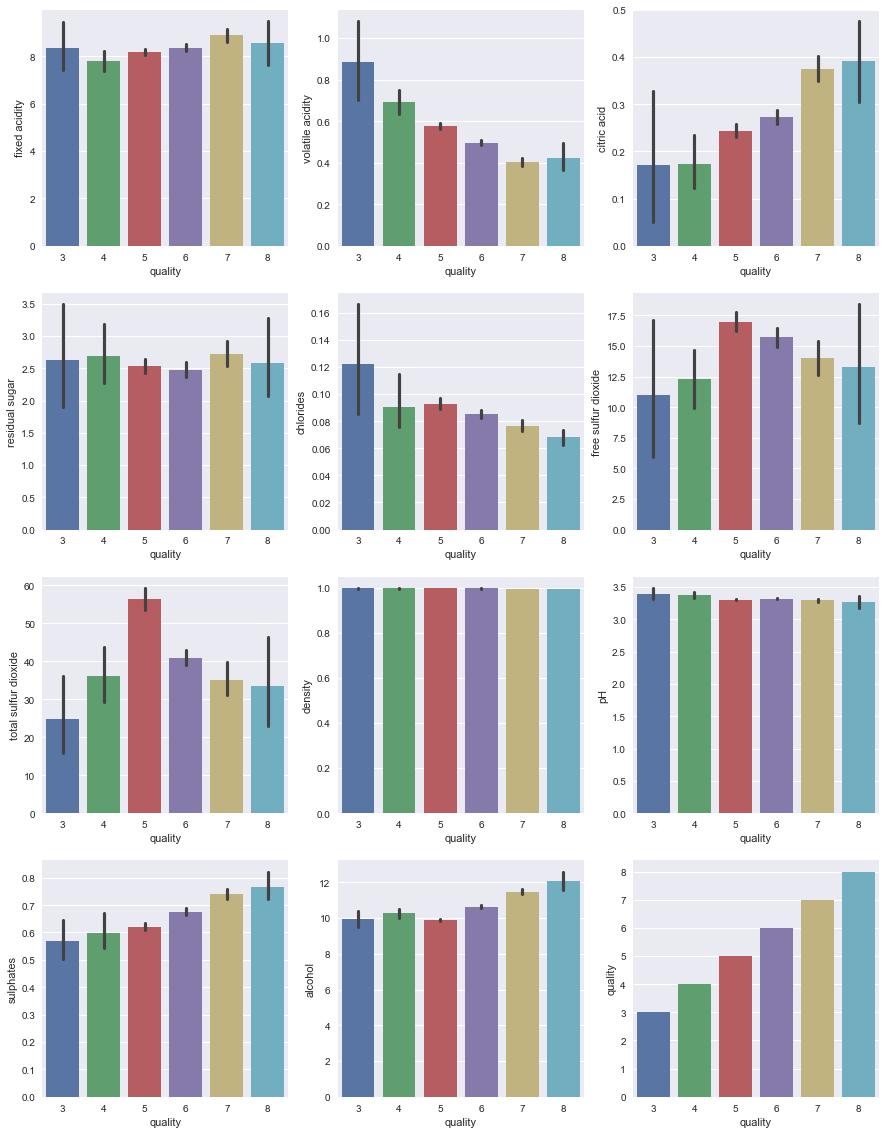

In [32]:
fig = plt.figure(figsize = [15,20])
cnt = 1
for col in df.columns :
    plt.subplot(4,3,cnt)
    sns.barplot(data = df, x = 'quality', y = col)
    cnt+=1
plt.show()  

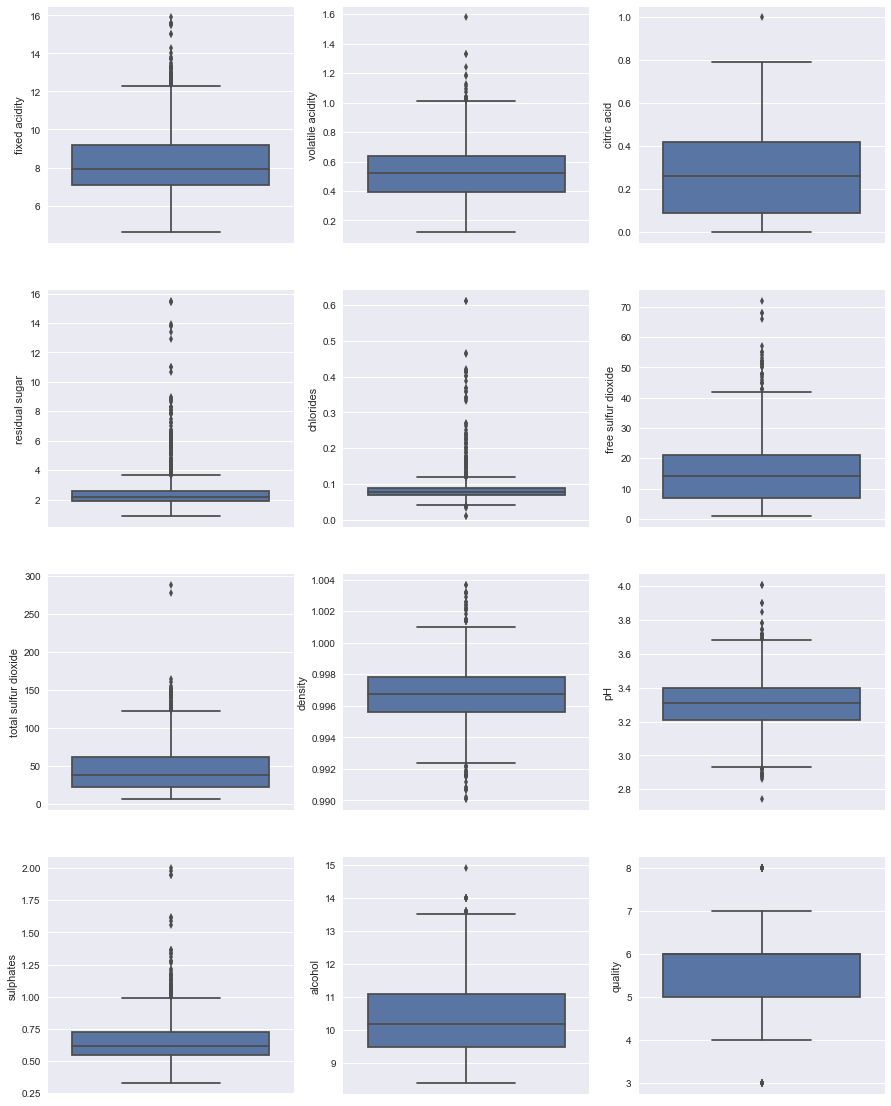

In [42]:
sns.set()
fig = plt.figure(figsize = [15,20])
cnt = 1
for col in df.columns :
    plt.subplot(4,3,cnt)
    sns.boxplot(data = df, y = col)
    cnt+=1
plt.show()

In [45]:
df['quality'] = df.quality.apply(lambda x : 1 if x > 6 else 0)

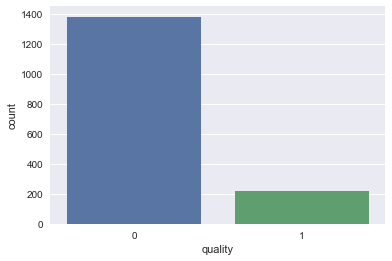

In [46]:
sns.countplot(data = df, x = 'quality')
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
x = df.drop('quality',1)
y = df['quality']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [93]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth=10)
# Fit the training data
fig = dt_basic.fit(x_train,y_train)
# Predict based on test data
y_preds = dt_basic.predict(x_test)

In [90]:
dt_basic

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
y_preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [62]:
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value

0.87083333333333335

In [63]:
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.92      0.93      0.92       412
          1       0.55      0.53      0.54        68

avg / total       0.87      0.87      0.87       480



In [64]:
# Calculate the number of nodes in the tree
dt_basic.tree_.node_count

183

In [95]:
from sklearn import tree

fig = clf.fit(x_train,y_train)
tree.plot_tree(fig)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [65]:
# Create a Parameter grid
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5

In [66]:
dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)

In [67]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(4, 20, 4), 'min_samples_leaf': range(20, 200, 40), 'min_samples_split': range(20, 200, 40), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
cv_result = pd.DataFrame(grid.cv_results_)
cv_result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005193,0.001199,0.872207,0.896558,gini,4,20,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",3,...,0.861607,0.890503,0.892857,0.902793,0.896861,0.902902,0.001327,0.000748,0.018728,0.006965
1,0.004998,0.001399,0.870420,0.894994,gini,4,20,60,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",23,...,0.866071,0.888268,0.879464,0.897207,0.896861,0.902902,0.001550,0.000799,0.016056,0.006692
2,0.005196,0.000800,0.864164,0.890081,gini,4,20,100,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",130,...,0.866071,0.888268,0.875000,0.890503,0.887892,0.888393,0.000979,0.000748,0.016933,0.003833
3,0.003997,0.000800,0.853441,0.874890,gini,4,20,140,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",193,...,0.866071,0.867039,0.857143,0.880447,0.869955,0.866071,0.000632,0.000748,0.017155,0.007674
4,0.006597,0.001799,0.853441,0.874890,gini,4,20,180,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",193,...,0.866071,0.867039,0.857143,0.880447,0.869955,0.866071,0.004713,0.002134,0.017155,0.007674


In [69]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [70]:
grid.best_score_

0.87578194816800714

In [71]:
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
best_grid.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value

0.87083333333333335

In [74]:
# Create and print confusion matrix
confusion_matrix(y_test,y_preds)

array([[382,  30],
       [ 32,  36]], dtype=int64)

In [75]:
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.92      0.93      0.92       412
          1       0.55      0.53      0.54        68

avg / total       0.87      0.87      0.87       480

